The dataset has 2 files - train and test which are explored individually here.

In [2]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the train data.

food_train = pd.read_excel('restraunt_food_Train.xlsx')
food_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
# Loading the test data.

food_test = pd.read_excel('restraunt_food_Test.xlsx')
food_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
# Let's check the shape of train and test dataset.

print("Shape of Train data :", food_train.shape)
print("Shape of Test data :",food_test.shape)

Shape of Train data : (12690, 9)
Shape of Test data : (4231, 8)


In [6]:
# Let's check the data types of each feature of train and test data.

print("---TRAIN DATA--- \n", food_train.dtypes)
print("\n")
print("---TEST DATA--- \n", food_test.dtypes)

---TRAIN DATA--- 
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object


---TEST DATA--- 
 TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object


The whole data is of string nature except for the target variable and 'RESTAURANT_ID' which is of integer type having 12690 rows andd 9 columns in train dataset and 4231 rows and 8 columns in the test dataset as it does not include target variable. The attributes to predict the cost for food are described below.

# Handling Null Values

In [7]:
# Let's check the null values of train data.

print("---TRAIN DATA--- \n",food_train.isnull().sum(), '\n')
print("---TEST DATA--- \n",food_test.isnull().sum())

---TRAIN DATA--- 
 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64 

---TEST DATA--- 
 TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


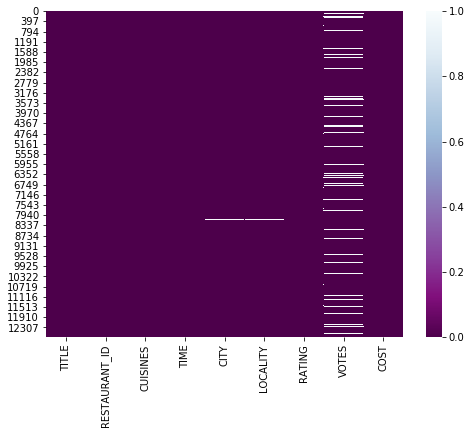

In [8]:
# Visualizing the null values of train data using heatmap.

plt.figure(figsize=(8,6))

sns.heatmap(food_train.isnull(), cmap = 'BuPu_r')

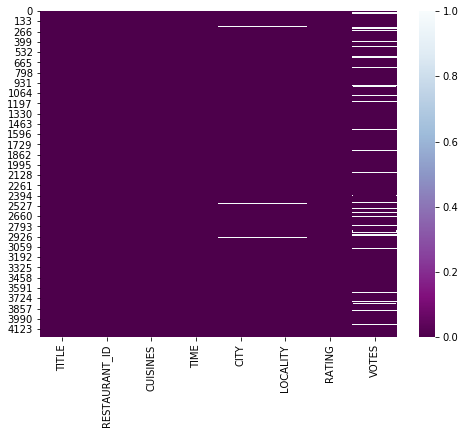

In [9]:
# Visualizing the null values of test data using heatmap.

plt.figure(figsize=(8,6))
sns.heatmap(food_test.isnull(), cmap = 'BuPu_r')

In both train8ng and testing dataset the null values are present in 'CITY', 'LOCALITY', 'RATING' and 'VOTES'.

In [10]:
# Let's check the mode of the Rating and Votes for both train annd test dataset.

rating_mode = food_train['RATING'].mode()
print("Mode of RATING of Test Data:", rating_mode,'\n')

vote_mode = food_train['VOTES'].mode()
print("Mode of VOTES Test Data:", vote_mode,'\n')


RATING_mode = food_test['RATING'].mode()
print("Mode of RATING of Test Data:", RATING_mode,'\n')

VOTES_mode = food_test['VOTES'].mode()
print("Mode of VOTES Test Data:", VOTES_mode,'\n')

Mode of RATING of Test Data: 0    3.9
dtype: object 

Mode of VOTES Test Data: 0    44 votes
dtype: object 

Mode of RATING of Test Data: 0    3.8
dtype: object 

Mode of VOTES Test Data: 0    6 votes
dtype: object 



In [11]:
# Replacing the null values with the mode of the respective column.

# Train data
food_train.CITY = food_train.CITY.fillna('Not_Known')
food_train.LOCALITY = food_train.LOCALITY.fillna('Not_Known')
food_train.RATING = food_train.RATING.fillna('3.9')
food_train.VOTES = food_train.VOTES.fillna('44 votes')

# Test data
food_test.CITY = food_test.CITY.fillna('Not_Known')
food_test.LOCALITY = food_test.LOCALITY.fillna('Not_Known')
food_test.RATING = food_test.RATING.fillna('3.8')
food_test.VOTES = food_test.VOTES.fillna('6 votes')

---TRAIN DATA--- 
 TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64 

---TEST DATA--- 
 TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64


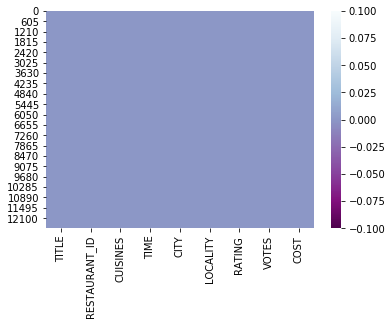

In [12]:
# Again checking the null values after filling the same.

print("---TRAIN DATA--- \n",food_train.isnull().sum(), '\n')
print("---TEST DATA--- \n",food_test.isnull().sum())

sns.heatmap(food_train.isnull(), cmap = 'BuPu_r')

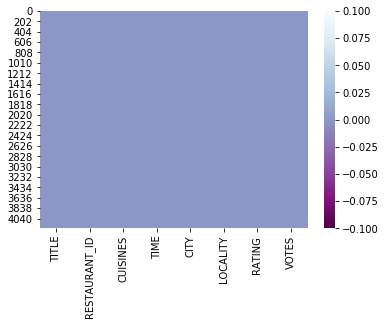

In [13]:
sns.heatmap(food_test.isnull(), cmap = 'BuPu_r')

So, all the null values have been filled.

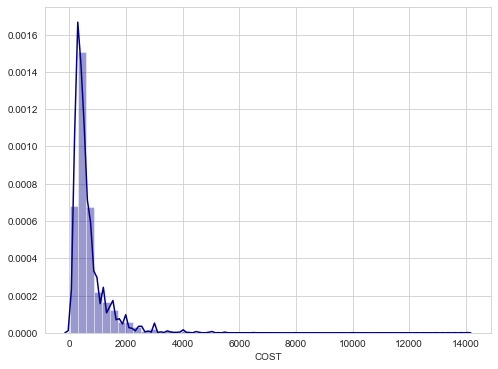

In [14]:
# Visualizing the distribution of target variable.

plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(food_train['COST'], color = 'darkblue')

# Handling the Object type data

In [15]:
# Let's check the string data from the train dataset.

food_obj = food_train.select_dtypes(include='object')
food_obj.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes


In [16]:
# Let's check  the value counts of each categorical feature.

for i in food_obj.columns:
    x = food_obj[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- TITLE --------
 QUICK BITES                  4218
CASUAL DINING                3652
None                         1003
CAFÉ                          607
DESSERT PARLOR                382
                             ... 
BAKERY,BEVERAGE SHOP            1
DESSERT PARLOR,PAAN SHOP        1
CASUAL DINING,FOOD COURT        1
QUICK BITES,FOOD TRUCK          1
CONFECTIONERY,QUICK BITES       1
Name: TITLE, Length: 113, dtype: int64


-------- CUISINES --------
 South Indian                                           532
North Indian                                           526
North Indian, Chinese                                  501
Fast Food                                              286
Chinese                                                167
                                                      ... 
Continental, American, Chinese, BBQ, Salad, Italian      1
Beverages, Sandwich, Fast Food                           1
Andhra, Seafood, Biryani                                 1
B

In [17]:
# Let's check  the value counts of test data.

for i in food_test.columns:
    x = food_test[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- TITLE --------
 QUICK BITES                   1416
CASUAL DINING                 1258
None                           284
CAFÉ                           223
DESSERT PARLOR                 126
                              ... 
PUB,CAFÉ                         1
FOOD TRUCK,DESSERT PARLOR        1
COCKTAIL BAR,CASUAL DINING       1
QUICK BITES,MEAT SHOP            1
CASUAL DINING,LOUNGE             1
Name: TITLE, Length: 86, dtype: int64


-------- RESTAURANT_ID --------
 12799    3
15454    3
4262     3
11169    3
1619     3
        ..
9598     1
11432    1
3451     1
5496     1
10241    1
Name: RESTAURANT_ID, Length: 4127, dtype: int64


-------- CUISINES --------
 North Indian, Chinese                            213
North Indian                                     190
South Indian                                     174
Fast Food                                         78
Chinese                                           59
                                                ... 


In [18]:
# Dropping the 'RESTAURANT_ID' and 'TIME' as every restraunt has it's unique id and have specific time of the restayrant to be opened and close whch will not affect the cost as such. Thus, dropping the both.

food_train = food_train.drop(['RESTAURANT_ID', 'TIME'], axis=1)
food_test = food_test.drop(['RESTAURANT_ID', 'TIME'], axis=1)

In [19]:
# Let's check the head of the both train and test dataset after dropping the columns

food_train.head(2)

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500


In [20]:
food_test.head(2)

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61 votes


In [21]:
# Replacing the NEW in 'RATING' for training and testing dataset.

food_train['RATING'] = food_train['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating
food_test['RATING'] = food_test['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating

In [22]:
# Stripping off or removing the 'votes' from the 'VOTES' e.g. 6 votes stripped off to 6, for training and testing dataset.

food_train["VOTES"] = food_train["VOTES"].str.rstrip("votes")
food_test["VOTES"] = food_test["VOTES"].str.rstrip("votes")

In [23]:
# Converting the data type of 'RATING' for both train and test dataset from object to float respectively.

food_train["RATING"]=food_train["RATING"].astype('float64')
food_test["RATING"]=food_test["RATING"].astype('float64')

In [24]:
# Converting the data type of 'VOTES'' for both train and test dataset from object to integer respectively.

food_train["VOTES"]=food_train["VOTES"].astype('int64')
food_test["VOTES"]=food_test["VOTES"].astype('int64')

In [25]:
# Let's again check the data type of train data.

food_train.dtypes

TITLE        object
CUISINES     object
CITY         object
LOCALITY     object
RATING      float64
VOTES         int64
COST          int64
dtype: object

In [26]:
# Let's again check the data type of train data.

food_test.dtypes

TITLE        object
CUISINES     object
CITY         object
LOCALITY     object
RATING      float64
VOTES         int64
dtype: object

In [27]:
# Let's check the remaining columns which are of object type.

rest_Train_obj = food_train.select_dtypes(include='object')
print(rest_Train_obj.columns, '\n')

rest_Test_obj = food_test.select_dtypes(include='object')
print(rest_Test_obj.columns)

Index(['TITLE', 'CUISINES', 'CITY', 'LOCALITY'], dtype='object') 

Index(['TITLE', 'CUISINES', 'CITY', 'LOCALITY'], dtype='object')


In [28]:
# Using the LabelEncoder in order to convert the object type data into numerical.

from sklearn.preprocessing import LabelEncoder


# For training data.
lb = {}
for i, feature in enumerate(rest_Train_obj):
    lb[feature] = LabelEncoder()
    food_train[feature] = lb[feature].fit_transform(food_train[feature])

food_train.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,321,285,3.6,49,1200
1,33,289,67,1047,4.2,30,1500
2,31,2976,67,1102,3.8,221,800
3,95,4130,222,136,4.1,24,800
4,50,1766,222,620,3.8,165,300


In [29]:
# For test data.
lb = {}
for i, feature in enumerate(rest_Test_obj):
    lb[feature] = LabelEncoder()
    food_test[feature] = lb[feature].fit_transform(food_test[feature])

food_test.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,23,1293,110,663,4.3,564
1,75,1632,96,221,4.2,61
2,23,1455,96,411,3.8,350
3,66,208,41,456,3.8,1445
4,75,1637,78,300,3.6,23


In [30]:
# Let's again check the data type of train data.

food_train.dtypes

TITLE         int32
CUISINES      int32
CITY          int32
LOCALITY      int32
RATING      float64
VOTES         int64
COST          int64
dtype: object

In [31]:
# Let's again check the data type of train data.

food_test.dtypes

TITLE         int32
CUISINES      int32
CITY          int32
LOCALITY      int32
RATING      float64
VOTES         int64
dtype: object

Thus, the feature engineering is done and the whole data is now in numeric form for both the train and test data.

# Statistical Summary

In [32]:
# Let's use the describe function to check the statistical summary of the train dataset.

food_train.describe()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,144.021749,656.940741,3.705477,380.405753,655.252246
std,32.762427,1204.091664,84.410254,399.109981,0.892218,809.110447,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,20.000000
25%,31.000000,1185.250000,67.000000,337.000000,3.500000,44.000000,300.000000
50%,59.000000,2416.500000,131.000000,590.000000,3.800000,132.000000,500.000000
75%,95.000000,3222.750000,222.000000,1010.000000,4.100000,405.000000,800.000000
max,112.000000,4154.000000,359.000000,1416.000000,5.000000,41186.000000,14000.000000


In [33]:
# statistical summary of the test dataset.

food_test.describe()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
count,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000,4231.000000
mean,45.781612,928.372489,59.170882,385.337745,3.687568,389.505791
std,26.409174,498.480193,38.818105,235.484564,0.915311,800.665248
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,23.000000,484.000000,18.000000,192.000000,3.500000,42.000000
50%,42.000000,1008.000000,55.000000,355.000000,3.800000,134.000000
75%,75.000000,1320.000000,96.000000,582.500000,4.100000,422.500000
max,85.000000,1726.000000,151.000000,834.000000,5.000000,15205.000000


# Correlation

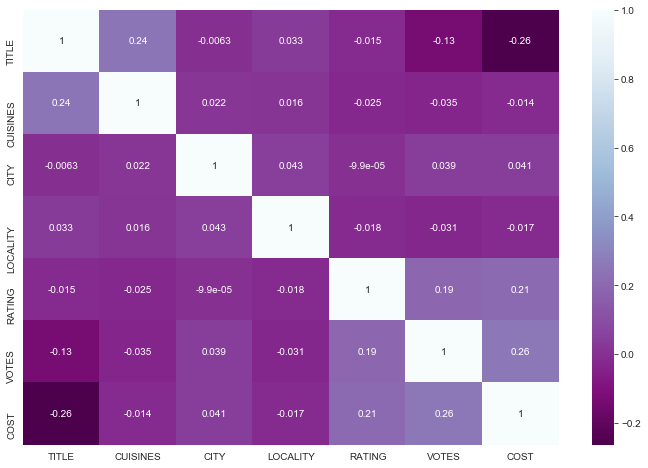

In [34]:
# Let's Visualize the train dataset's correlation using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(food_train.corr(), cmap= "BuPu_r", annot= True)

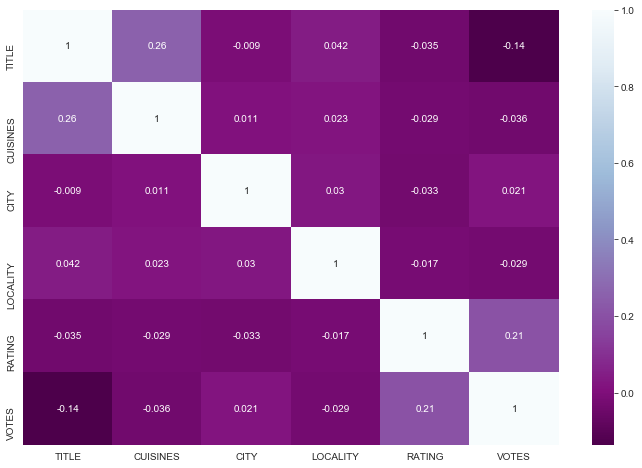

In [35]:
# Let's Visualize the test dataset's correlation using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(food_test.corr(), cmap= "BuPu_r", annot= True)

# Removing outliers and skewness

TRAIN DATASET

In [36]:
# Let's check the data types of each feature.

food_train.skew()

TITLE       -0.069803
CUISINES    -0.218782
CITY         0.235724
LOCALITY     0.327651
RATING      -2.618548
VOTES       14.609221
COST         3.978801
dtype: float64

In [37]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(food_train))
print(z.shape)

# Removing the outliers.

food_train = food_train.loc[(z<3).all(axis=1)]
print(food_train.shape)

(12690, 7)
(11773, 7)


By comparing shape of 'z' and 'food_train' shape , 917 rows have been removed as an outlier.

In [38]:
# Treating the skewness with sqrt function.

for col in food_train.columns:
    if food_train.skew().loc[col]>0.55:
        food_train[col]=np.sqrt(food_train[col])

In [39]:
# Again checking the skewness after treament.

food_train.skew()

TITLE      -0.084354
CUISINES   -0.217130
CITY        0.281310
LOCALITY    0.315860
RATING      0.164154
VOTES       1.278935
COST        1.002538
dtype: float64

The skewness have been reduced a lot and to it's ost possible extent for the train dataset.

TEST DATASET

In [40]:
# Let's check the skewness of the data before removing the outliers.

food_test.skew()

TITLE      -0.019891
CUISINES   -0.211171
CITY        0.065922
LOCALITY    0.294979
RATING     -2.573228
VOTES       7.054846
dtype: float64

In [41]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(food_test))
print(z.shape)

# Removing the outliers.

food_test = food_test.loc[(z<3).all(axis=1)]
print(food_test.shape)

(4231, 6)
(3980, 6)


By comparing shape of 'z' and 'df_flight_test' shape , 251 rows have been removed as an outlier.

In [42]:
# Treating the skewness with sqrt function.

for col in food_test.columns:
    if food_test.skew().loc[col]>0.55:
        food_test[col]=np.sqrt(food_test[col])

In [43]:
# Again checking the skewness after treament.

food_test.skew()

TITLE      -0.032011
CUISINES   -0.209136
CITY        0.121843
LOCALITY    0.280950
RATING      0.057536
VOTES       1.118155
dtype: float64

For test data also, the skeewness has been reduced to it's possible extent.

# Separating the input and output variables

In [44]:
# Let's Separating the input and target variables

X = food_train.drop(columns=["COST"])
y = food_train[["COST"]]

In [45]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(11773, 6)
(11773, 1)


In [46]:
# Let's check the head of the input variables.
X.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,31,2627,321,285,3.6,7.000000
1,33,289,67,1047,4.2,5.477226
2,31,2976,67,1102,3.8,14.866069
3,95,4130,222,136,4.1,4.898979
4,50,1766,222,620,3.8,12.845233


In [47]:
# Let's check the head of the output variables.
y.head()

,COST
0,34.641016
1,38.729833
2,28.284271
3,28.284271
4,17.320508


# Standard Scaling

In [48]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.87859082,  0.32360624,  2.08257571, -0.9289356 , -0.48625552,
        -0.75935946],
       [-0.81781393, -1.61114657, -0.88563162,  0.97668974,  0.71611495,
        -0.90967559],
       [-0.87859082,  0.61241237, -0.88563162,  1.11423488, -0.08546536,
         0.01711602],
       ...,
       [ 0.33694703, -0.12242959,  1.12433555,  1.71693266,  0.3153248 ,
         0.98366331],
       [-0.87859082,  1.05100047, -0.88563162, -0.06365165, -0.6866506 ,
        -0.89194408],
       [-0.87859082,  0.58758663, -0.13773686,  1.69442527, -0.88704567,
         1.11806639]])

# Training And Testing the Models

In [49]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [50]:
# Splitting the training and testing data and finding the maximum r2 score at random state.

score = []
MSE = []
MAE = []
RMSE = []

def max_r2_score (reg, X, y):
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score :", max_r_scr, "achieved at", final_r_state)
    score.append(max_r_scr)
    print('\n')
    print ("Train acc",reg.score(X_train,y_train))
    print('\n')
    mse = np.sqrt(mean_absolute_error(y_test, pred))
    print("Mean Absolute Error : ",mse)
    MSE.append(mse)
    print('\n')
    mae = mean_absolute_error(y_test, pred)
    print("Mean absolute error :", mae)
    MAE.append(mae)
    print('\n')
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print("RMSE : ", rmse)
    RMSE.append(rmse)

In [51]:
# Creating the instances for the algorithms.

lr = LinearRegression()
lreg = Lasso()
rg = Ridge()
sv = SVR()
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor()
rfr = RandomForestRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()

In [52]:
models = []
models.append(('LinearRegression', lr))
models.append(('Lasso', lreg))
models.append(('Ridge', rg))
models.append(('SVR', sv))
models.append(('DecisionTreeRegressor', dtr))
models.append(('KNeighborsRegressor', knnr))
models.append(('RandomForestRegressor', rfr))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))

In [53]:
# Creating a list which holds the algorithms.

model = []
cvs = []
STD = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    cvs.append(mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    STD.append(stdR2)
    print('\n')
    print('\n')

-------- LinearRegression --------
Maximum r2 score : 0.3446133415216004 achieved at 63


Train acc 0.31090811800101315


Mean Absolute Error :  2.20304572906432


Mean absolute error : 4.853410484348542


RMSE :  6.641061906937234


Cross validation score (Mean r2 score): 0.3101821407611699
Standard Deviationin r2 score : 0.011022267079253112




-------- Lasso --------
Maximum r2 score : 0.2982739615961012 achieved at 76


Train acc 0.2762085126290872


Mean Absolute Error :  2.231891570266645


Mean absolute error : 4.98133998142731


RMSE :  6.8125110334366425


Cross validation score (Mean r2 score): 0.2753166963428181
Standard Deviationin r2 score : 0.010175097415458098




-------- Ridge --------
Maximum r2 score : 0.34460964497549107 achieved at 63


Train acc 0.31090811564371656


Mean Absolute Error :  2.2030443786117764


Mean absolute error : 4.853404534132949


RMSE :  6.641066369430569


Cross validation score (Mean r2 score): 0.31018223153645696
Standard Deviationin r2 s

In [54]:
result = pd.DataFrame({"Model": models, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE, "Standard Deviation": STD})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error,Standard Deviation
0,"(LinearRegression, LinearRegression(copy_X=Tru...",0.344613,0.310182,2.203046,4.853410,0.011022
1,"(Lasso, Lasso(alpha=1.0, copy_X=True, fit_inte...",0.298274,0.275317,2.231892,4.981340,0.010175
2,"(Ridge, Ridge(alpha=1.0, copy_X=True, fit_inte...",0.344610,0.310182,2.203044,4.853405,0.011022
3,"(SVR, SVR(C=1.0, cache_size=200, coef0=0.0, de...",0.421781,0.391937,2.102467,4.420366,0.010972
4,"(DecisionTreeRegressor, DecisionTreeRegressor(...",0.450505,0.409480,2.146603,4.607906,0.023858
5,"(KNeighborsRegressor, KNeighborsRegressor(algo...",0.446489,0.396880,2.100262,4.411100,0.012545
6,"(RandomForestRegressor, (DecisionTreeRegressor...",0.717736,0.687548,1.818338,3.306352,0.015946
7,"(AdaBoostRegressor, (DecisionTreeRegressor(ccp...",0.432761,0.351363,2.220027,4.928521,0.027584
8,"(GradientBoostingRegressor, ([DecisionTreeRegr...",0.693266,0.665929,1.847346,3.412688,0.012043


RandomForestRegressor is selected as a model for this dataset as it is giving the best results out of all the algorithms tested, with the accuracy of 0.71 at 81.

In [55]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(rfr, 'food_cost.pkl')

['food_cost.pkl']